# Exercise 1.8 (Asian Option)

Consider the three-period model of Example 1.2.1, with $S_0 = 4$, $u = 2$, $d = 1/2$ and take $t$ he interest rate $r = 1/4 $, so that $\tilde{p} = \tilde{q} = 1/2$. For $n = 0, 1, 2, 3$ define $Y_{n} = \sum_{n=0}^{k}S_{n}$ to be the sum of the stock prices between times zero and $n$. Consider an Asian call option that expires at time three and has strike $K = 4$ (i.e. , whose payoff at time three is $(Y_{3}/4 - 4)^{+}$. This is like a European call, except the payoff of the option is based on the average stock price rather than the final stock price. Let $v_{n} (s, y)$ denote the price of this option at time $n$ if $S_n = s$ and $Y_n = y$. In particular, $v_{3} (s, y) = (y/4 - 4)^{+}$ .

Implement algorithm that computes value of put options at time step t, and number of shares in replicating portfolio.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

# import jtplot module in notebook
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='oceans16')

def sn(n, params):
    
    # Function that returns list of all stock values at Sn
    
    return np.array([params['S0'] * (params['u']**(n-k)) * (params['d']**k) for k in range(n+1) ])

def Sn(n, params):
    
    # Compute stock price at n for all combinations
    
    si = [params['S0']]
    for i in range(n):
        si = np.kron(si, [params['u'], params['d']])

    return si

def Asian_Yn(n, params):
    
    # Compute all yn outcomes from Asian option
    
    yni = [params['S0']]
    
    for i in range(n):
        
        yni = np.kron(yni, [1,1]) + Sn(i+1, params)
        
    return yni

def Asian_VN(n, params):
    
    # Compute payout at time final time N
    
    return(Asian_Yn(n, params)/4 - params['K']).clip(min=0)

def Asian_Vn(n, params):
    
    # Compute price of option at time n < N is the max
    
    Vns = Asian_VN(params['N'], params)
    
    for i in range(params['N']-n):
        
        Vns = np.reshape(Vns, (int(len(Vns)/2), 2))@[params['p'], params['q']]/(1 + params['r'])
    
    return Vns

def Asian_deltan(n, params):
    
    # For each path way compute share holdings 
    
    vi =  Asian_Vn(n+1, params)
    si =  Sn(n+1, params)
    
    for i in range(N-n):
        
        dv = np.reshape(vi, (int(len(vi)/2), 2))@[1, -1]
        ds = np.reshape(si, (int(len(si)/2), 2))@[1, -1]
    
    return dv/ds

In [43]:
# Initial parameters
S0 = 4
r = 1/4
p = 2/3
q = 1 - p
u = 2
d = 1/2
K = 0
X0 = 0
N = 7

params = {'S0': S0, 
          'r': r,
          'p': p,
          'q': q,
          'u': u,
          'd': d,
          'K': K,
          'X0': X0,
         'N': N}

In [44]:
# print of put options at each time step options
for i in range(N+1):
    
    # print("t =",i, "S_t =", Sn(i,params))
    print(len(np.unique(Sn(i, params))))

1
2
3
4
5
6
7
8


In [47]:
# print of put options at each time step options
for i in range(N+1):
    
    # print("t =",i, "v_t =", Asian_Vn(i,params))
    print(len(np.unique(Asian_Vn(i, params))))

1
2
4
8
15
28
47
60


In [24]:
# print of number of shares in replicating portfollio
for i in range(3):
    
    print("t =",i, "delta_t =", Asian_deltan(i,params))

t = 0 delta_t = [0.5]
t = 1 delta_t = [0.25 0.25]


UnboundLocalError: local variable 'dv' referenced before assignment

In [1050]:
u*p + d*q

1.5

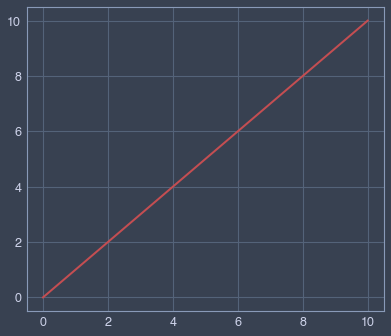